Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

Anne Lohmeijer 10447555

Lukas Kiss 12457299

Steven Raaijmakers

----
# Project keywords
ODEs, time integration

----
# Project description
There is a wide variety of mathematical models for time-evolving systems formulated as sets of coupled ordinary differential equations (ODEs). Examples range from meteorology and population dynamics to celestial mechanics and chemical reactions. In many cases, these ODEs cannot be solved analytically, and instead they are simulated by means of numerical time integration. In this assignment we will explore various various time integration methods.



We consider a very simple system, one where we know the exact (analytical) solution so that we can easily compare results from numerical integration with the exact solution. The set of ODEs
$$\begin{array}{rcl}
\frac{dx}{dt} & = & y, \\
\frac{dy}{dt} & = & -\omega^2 \, x
\end{array}$$
are the equations for the $\textit{harmonic oscillator}$. This is a Hamiltonian system for which the Hamiltonian (or total energy) is given by $H=\tfrac12 (y^2 + \omega^2 \, x^2)$. 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

----
# Project exercises
## Exercise 1
Read sections 9.1-9.3 from the book by Heath.



## Exercise 2
Solve the ODEs for the harmonic oscillator. Write down exact expressions for $x(t)$ and $y(t)$ given an arbitrary initial condition $x(t=0)=x_0, \, y(t=0)=y_0$. Make sure you solution is correct, as this will be your benchmark to compare numerical solutions against.



We have a set of two ODE's for the harmonic oscillator with Hamiltonian $H =\frac{1}{2}(y^2 + \omega^2 x^2)$:

$\dot{x} = y$

$\dot{y} = -\omega^2 x$

A general set of solutions for this set of ODE's is 

$x(t) = c_1 \cos(\omega t) + c_2 \sin(\omega t)$

$y(t) = c_2 \omega \cos(\omega t) - c_1 \omega \sin(\omega t)$

Then in order to fullfill the initial condition $x(t=0) = x_0$ we find $c_1 = x_0$, and to fullfill the initial condition $y(t=0) = y_0$ we find $c_2 = \frac{y_0}{\omega}$. Then the exact expression for $x(t)$ and $y(t)$ are 

$x(t) = x_0 \cos(\omega t) + \frac{y_0}{\omega} \sin(\omega t)$

$y(t) = y_0 \cos(\omega t) - x_0 \omega \sin(\omega t)$

Which satisfy all conditions.

## Exercise 3
Prove that the Hamiltonian is a conserved quantity, i.e. $H$ remains constant in time.



Using the set of solutions derived in Ex. 2, we can write out the Hamiltionian:

$H = \frac{1}{2}(y^2 + \omega^2 x^2) = \frac{1}{2}\left( y_o^2 \cos^2(\omega t) + x_0^2 \omega^2 \sin^2(\omega t) - 2 y_0 x_0 \omega \cos(\omega t)\sin(\omega t) + \omega^2 x_0^2 \cos(\omega t) + y_0^2 \sin^2 (\omega t) + 2 x_0 y_0 \cos (\omega t) \sin (\omega t) \right)$

$ \quad = \frac{1}{2} \left( y_0^2 \left( \cos^2(\omega t) + \sin^2(\omega t) \right) + x_0^2 \omega^2 \left( \cos^2(\omega t) + \sin^2(\omega t)\right) \right)$

$ \quad = \frac{1}{2} \left( y_0^2 + x_0^2 \omega^2) \right)$

Since $x_0$, $y_0$ and $\omega$ all are independent of time, we find that

$\dfrac{dH}{dt} = \dfrac{d}{dt}\left( \dfrac{1}{2} \left( y_0^2 + x_0^2 \omega^2 \right) \right) = 0$,

and thus that the Hamiltonian is a conserved quantity because it remains constant with time.

## Exercise 4
Set $\omega=1$. Use the forward Euler scheme to integrate the ODEs in time, from $t=0$ to $t=50$, with initial condition e.g. $(x_0,y_0)=(1,0)$. What is you time step $\Delta t$? Compare your numerical solution with the exact solution: make a plot of $x(t)$ versus $t$ for both solutions, and plot $H$ versus $t$. Pick a set of initial conditions (e.g. the corners of a square, $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$), integrate these forward up to $t=10$, and plot the paths $(x(t),y(t))$. Compare with the exact solution.



In [3]:
# functions
def xt(init, t, omega):
    return init[0]*np.cos(omega*t) + (init[1]*np.sin(omega*t))/omega

def yt(init, t, omega):
    return init[1]*np.cos(omega*t) - init[0]*omega*np.sin(omega*t)

In [48]:
# derivations of functions (given in exercise)
def dxdt(y):
    return y

def dydt(omega, x):
    return -np.power(omega,2) * x

In [14]:
# hamilton
def hamilton(x, y, omega):
    return 1/2. * (np.power(y,2) + np.power(omega,2) * np.power(x,2))

In [6]:
# forward euler
def fwe(v, t_range, omega, n=1000):
    t_start, t_end = t_range
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [v]
    
    for _ in Ts[1:]:
        Vs.append(Vs[-1] + h * np.array([dxdt(Vs[-1][1]), dydt(omega, Vs[-1][0])]))
    return Ts, np.asarray(Vs), h

In [9]:
# Plotting function
def plot(init, t_range, omega=1, n=3000, visible=[1,1,1], f_integration=fwe):
    
    print("#"*100)
    print("Plot for params: init={}, omega={}, time_range={}, n={}".format(init,omega,t_range,n))

    Ts, xy, h = f_integration(init, t_range, omega, n)
    print("Time step: " + str(h))
    
    v_X = np.vectorize(lambda t: xt(init, t, omega))
    v_Y = np.vectorize(lambda t: yt(init, t, omega))
    
    x = v_X(Ts)
    y = v_Y(Ts)
    
    #xt, yt over time    
    if visible[0] == 1:
        fig, ax = plt.subplots(1,2,figsize=(13, 6))
        
        ax[0].plot(Ts, xy)
        ax[0].set_title("x(t) and y(t) from euler integration.")
        ax[0].legend(["x(t)", "y(t)"])

        ax[1].plot(Ts, list(zip(x,y)))
        ax[1].set_title("Exact x(t) and y(t)")
        ax[1].legend(["x(t)", "y(t)"])
    
    # xt vs yt
    if visible[1] == 1:
        # plot each one opposite
        fig, ax = plt.subplots(1,2,figsize=(13, 6))

        eX = xy[:,0]
        eY = xy[:,1]    
        
        ax[0].set_xlim([-2,2])
        ax[0].set_ylim([-2,2])
        
        ax[0].plot(eX,eY)
        ax[0].set_title("x(t) vs y(t) from euler integration.")
        
        ax[1].set_xlim([-2,2])
        ax[1].set_ylim([-2,2])
        
        ax[1].plot(x,y)
        ax[1].set_title("Exact x(t) vs y(t)")
        
    # hamiltonian
    if visible[2] == 1:
        Eham = np.apply_along_axis(lambda ar : hamilton(ar[0],ar[1], omega), 1, xy)
        ham = np.apply_along_axis(lambda ar : hamilton(ar[0],ar[1], omega), 1, np.column_stack((x,y)))

        fig, ax = plt.subplots(1,2,figsize=(13, 6))

        ax[0].plot(Ts, Eham)
        ax[0].set_title("Hamiltonian plot from euler integration.")

        ax[1].plot(Ts, ham)
        ax[1].set_title("Exact Hamiltonian plot")

####################################################################################################
Plot for params: init=[ 1.  0.], omega=1, time_range=(0, 50), n=3000
Time step: 0.0166722240747


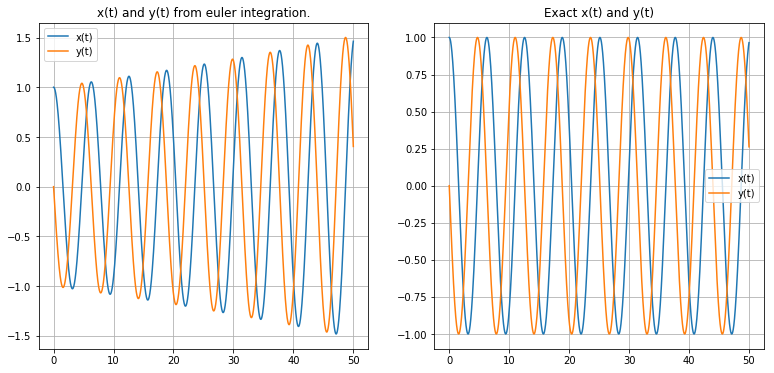

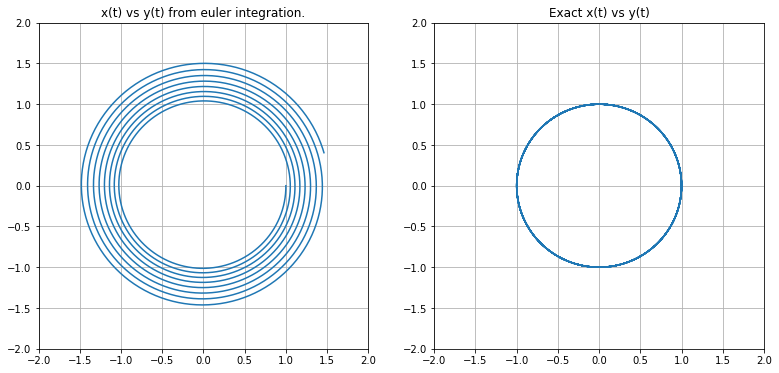

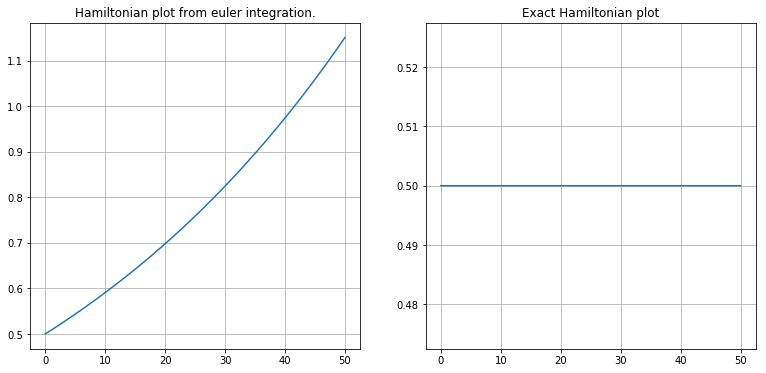

In [10]:
init = np.array([1.0, 0.0])
plot(init, (0, 50))

####################################################################################################
Plot for params: init=[ 0.5  1.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


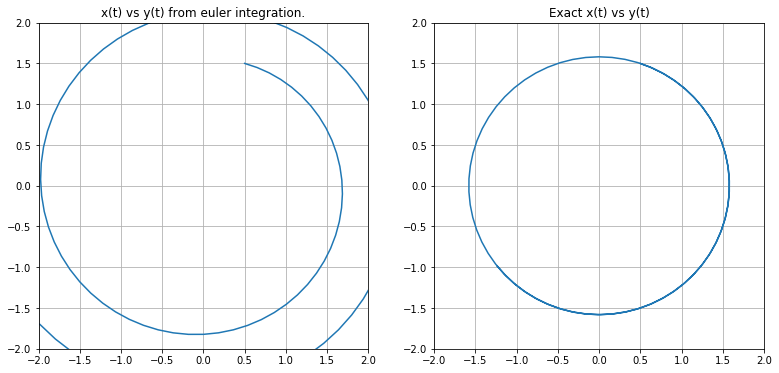

In [13]:
init = np.array([0.5, 1.5])
plot(init, (0, 10), n=100, visible=[0,1,0])

####################################################################################################
Plot for params: init=[ 1.   0.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


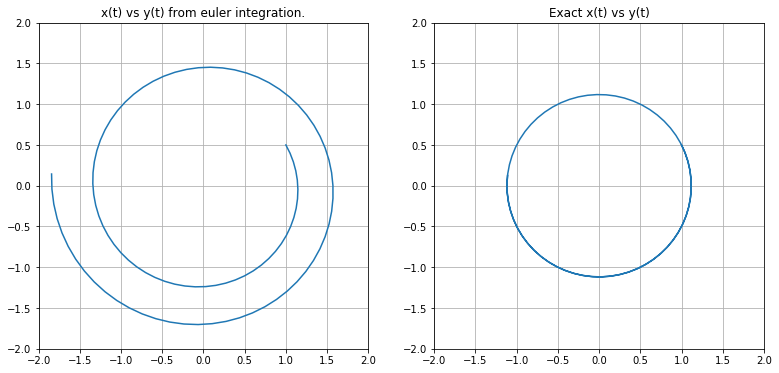

In [12]:
init = np.array([1, 0.5])
plot(init, (0, 10), n=100, visible=[0,1,0])

####################################################################################################
Plot for params: init=[ 0.5   0.78], w=1, time=(0, 10), n=100
Time step: 0.10101010101


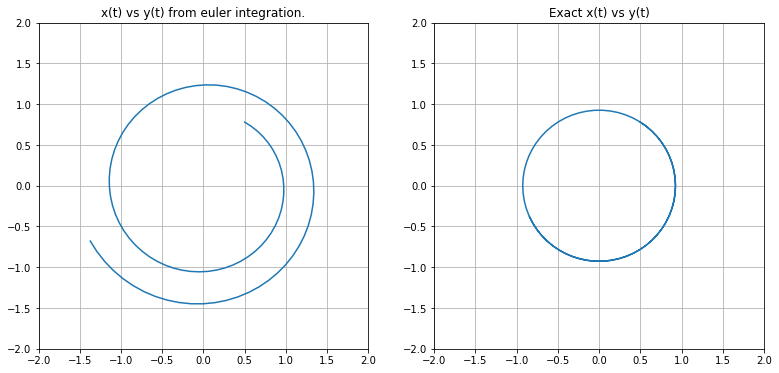

In [87]:
init = np.array([0.5,0.78])
plot(init, (0, 10), n=100, visible=[0,1,0])

## Exercise 5
Experiment with changing the integration time step $\Delta t$. Assess the convergence by plotting the norm of the error (at some fixed time, e.g. $t=1$) versus $\Delta t$, over several orders of magnitude of $\Delta t$. Can you see that Euler's method is 1st order accurate?



/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


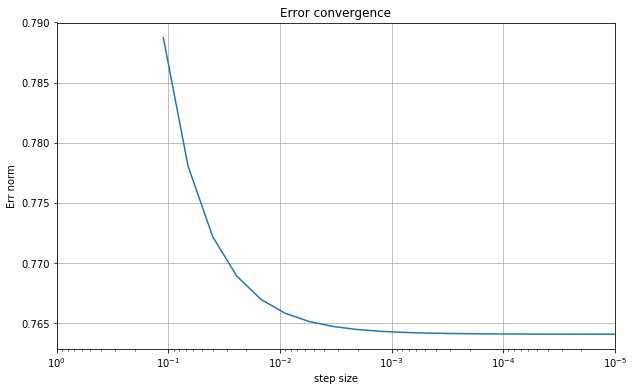

In [16]:
init= np.array([1,0])
t_end = 1
omega = 1
ex_val = xt(init, 1, w) # exact value
timesteps = []
norm_err = []

# do simulation 20 times on logscale
for i in np.logspace(1, 5, 20):
    Ts, xy, h = fwe(init, (0, t_end), omega, int(i))
    x_num = xy.T[0]
    num_val =x_num[len(x_num)-1] # this is at t = 1
    timesteps.append(h)
    norm_err.append(np.linalg.norm(np.array([ex_val, num_val])))

plt.semilogx(timesteps, norm_err)
plt.xlim(1, 0)
plt.ylabel("Err norm")
plt.xlabel("step size")
plt.title("Error convergence")
plt.show()

## Exercise 6
Repeat the experiments above, but now with the backward Euler scheme.



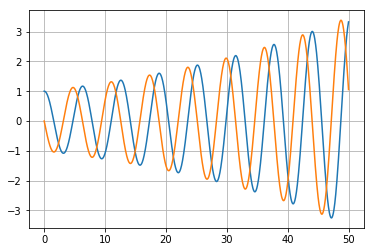

In [49]:
from scipy.optimize import fsolve

def helper(y0, y1, h, omega):
    return y1 - y0 + h * np.array([dxdt(y1[1]), dydt(omega, y1[0])])

# backwards euler
def bwe(v, t_range, omega, n=1000):
    t_start, t_end = t_range
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [v]
    
    for _ in Ts[1:]:
        # solve        
        Vs.append(optimize.fsolve(helper, Vs[-1], args=(Vs[-1], h, 1)))
        
    return Ts, np.asarray(Vs), h

Ts, xy, h = bwe([1, 0], (0, 50), 1)

plt.plot(Ts, xy)

## Exercise 7
Experiment with an integration schemes that gives higher order accuracy. Can you verify the order of accuracy with your numerical experiments? Does it conserve the Hamiltonian?



## Exercise 8
It is far from trivial that a time integration method respects conservation properties of the systems of ODEs, such as energy conservation. The topic of \textit{geometric numerical integration} deals with integration methods that are structure-preserving; preserving the Hamiltonian structure (and thereby the Hamiltonian itself) is one example.



The St\"{o}rmer -Verlet (SV) scheme preserves the symplectic structure of Hamiltonian systems. For a general set of ODEs given by $dx/dt = f(y), \,\, dy/dt = g(x)$, the SV scheme with time step $\Delta t$ reads
$$\begin{array}{rcl}
    y^* & = & y_k + \frac{1}{2} \Delta t \cdot g(x_k) \\
    x_{k+1} & = & x_k + \Delta t \cdot f(y^*) \\
    y_{k+1} & = & y^* + \frac{1}{2} \Delta t \cdot g(x_{k+1}).
\end{array}$$

Use this scheme to integrate the ODEs of the harmonic oscillator. Compare with the results from other integration schemes.

What happens with the Hamiltonian when using the SV scheme? What is the order of accuracy of the SV scheme?